In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Step 1: List all image files in the current directory (or a specified directory)
def get_image_files(directory="."):
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff') # Supported image formats
return [os.path.join(directory, f) for f in os.listdir(directory) if f.lower().endswith(valid_extensions)]

# Step 2: Define a function to process each image
def process_image(image_path):
# Read the image
image = cv2.imread(image_path)

# Resize the image for easier visualization (optional)
image = cv2.resize(image, (400, 300))

# Convert the image to HSV (Hue, Saturation, Value) color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color ranges in HSV format
# Red color range
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])

# Green color range
lower_green = np.array([36, 100, 100])
upper_green = np.array([70, 255, 255])

# Blue color range
lower_blue = np.array([100, 150, 0])
upper_blue = np.array([140, 255, 255])

# Create masks for each color
mask_red = cv2.inRange(hsv_image, lower_red, upper_red)
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Apply the masks to the original image
result_red = cv2.bitwise_and(image, image, mask=mask_red)
result_green = cv2.bitwise_and(image, image, mask=mask_green)
result_blue = cv2.bitwise_and(image, image, mask=mask_blue)

# Step 3: Process each image in the directory
directory = "." # Change this to the desired directory path
image_files = get_image_files(directory)

images = []
results_red = []
results_green = []
results_blue = []

for image_file in image_files:
  image, result_red, result_green, result_blue = process_image(image_file)
  images.append(image)
  results_red.append(result_red)
  results_green.append(result_green)
  results_blue.append(result_blue)

# Step 4: Display the original images and results in a grid
num_images = len(images)
fig, axes = plt.subplots(num_images, 4, figsize=(20, 5 * num_images))

if num_images > 0:
  for i in range(num_images):
    # Display the original image
    axes[i, 0].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis('off')

    # Display the red color detection result
    axes[i, 1].imshow(cv2.cvtColor(results_red[i], cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title("Red Color Detection")
    axes[i, 1].axis('off')

    # Display the green color detection result
    axes[i, 2].imshow(cv2.cvtColor(results_green[i], cv2.COLOR_BGR2RGB))
    axes[i, 2].set_title("Green Color Detection")
    axes[i, 2].axis('off')

    # Display the blue color detection result
    axes[i, 3].imshow(cv2.cvtColor(results_blue[i], cv2.COLOR_BGR2RGB))
    axes[i, 3].set_title("Blue Color Detection")
    axes[i, 3].axis('off')

  # Adjust layout and display the grid
  plt.tight_layout()
  plt.show()
else:
  print("No images found in the directory.")

Path A : More colours

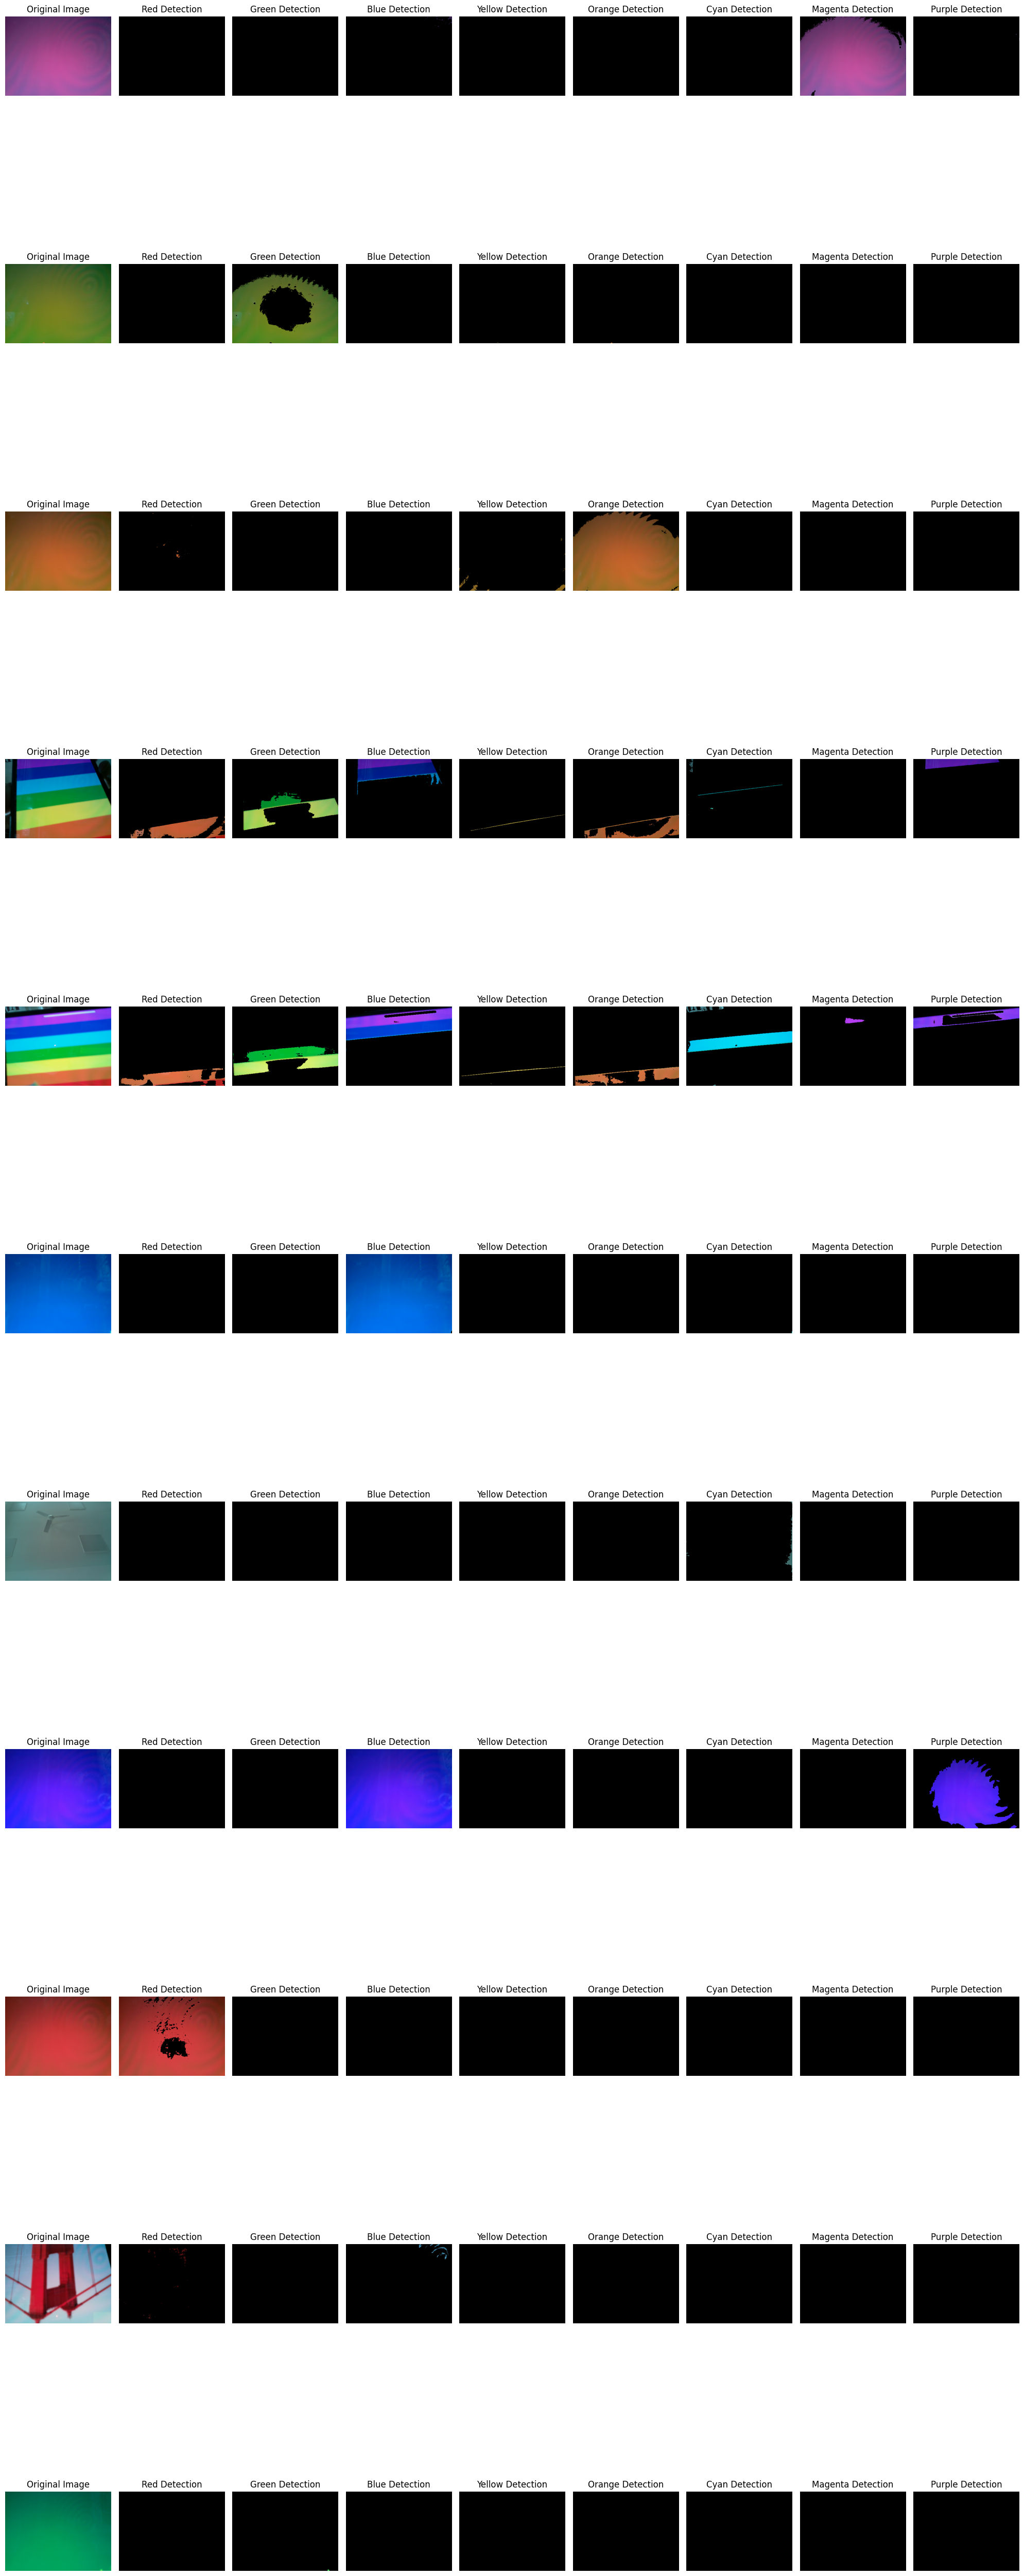

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Define a function to process each image
def process_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Resize the image for easier visualization (optional)
    image = cv2.resize(image, (400, 300))

    # Convert the image to HSV (Hue, Saturation, Value) color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color ranges in HSV format
    color_ranges = {
        "Red": (np.array([0, 120, 70]), np.array([10, 255, 255])),
        "Green": (np.array([36, 100, 100]), np.array([70, 255, 255])),
        "Blue": (np.array([100, 150, 0]), np.array([140, 255, 255])),
        "Yellow": (np.array([20, 100, 100]), np.array([30, 255, 255])),
        "Orange": (np.array([10, 100, 100]), np.array([20, 255, 255])),
        "Cyan": (np.array([85, 100, 100]), np.array([95, 255, 255])),
        "Magenta": (np.array([140, 100, 100]), np.array([160, 255, 255])),
        "Purple": (np.array([125, 100, 100]), np.array([135, 255, 255]))
    }

    # Apply masks for each color
    color_results = {}
    for color_name, (lower_bound, upper_bound) in color_ranges.items():
        mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
        result = cv2.bitwise_and(image, image, mask=mask)
        color_results[color_name] = result

    return image, color_results

# Step 2: Process images in the current directory
def get_image_files(directory="."):
    valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")  # Supported image formats
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.lower().endswith(valid_extensions)]

directory = "."  # Change this to the desired directory
image_files = get_image_files(directory)

images = []
color_results_all = []

for image_file in image_files:
    image, color_results = process_image(image_file)
    images.append(image)
    color_results_all.append(color_results)

# Step 3: Display the original images and results in a grid
num_images = len(images)
num_colors = len(color_results_all[0]) if color_results_all else 0
fig, axes = plt.subplots(num_images, num_colors + 1, figsize=(20, 5 * num_images))

for i in range(num_images):
    # Display the original image
    axes[i, 0].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis('off')

    # Display color detection results
    for j, (color_name, color_result) in enumerate(color_results_all[i].items(), start=1):
        axes[i, j].imshow(cv2.cvtColor(color_result, cv2.COLOR_BGR2RGB))
        axes[i, j].set_title(f"{color_name} Detection")
        axes[i, j].axis('off')

# Adjust layout and display the grid
plt.tight_layout()
plt.show()


Path B : RGB but boken down into smaller subtones

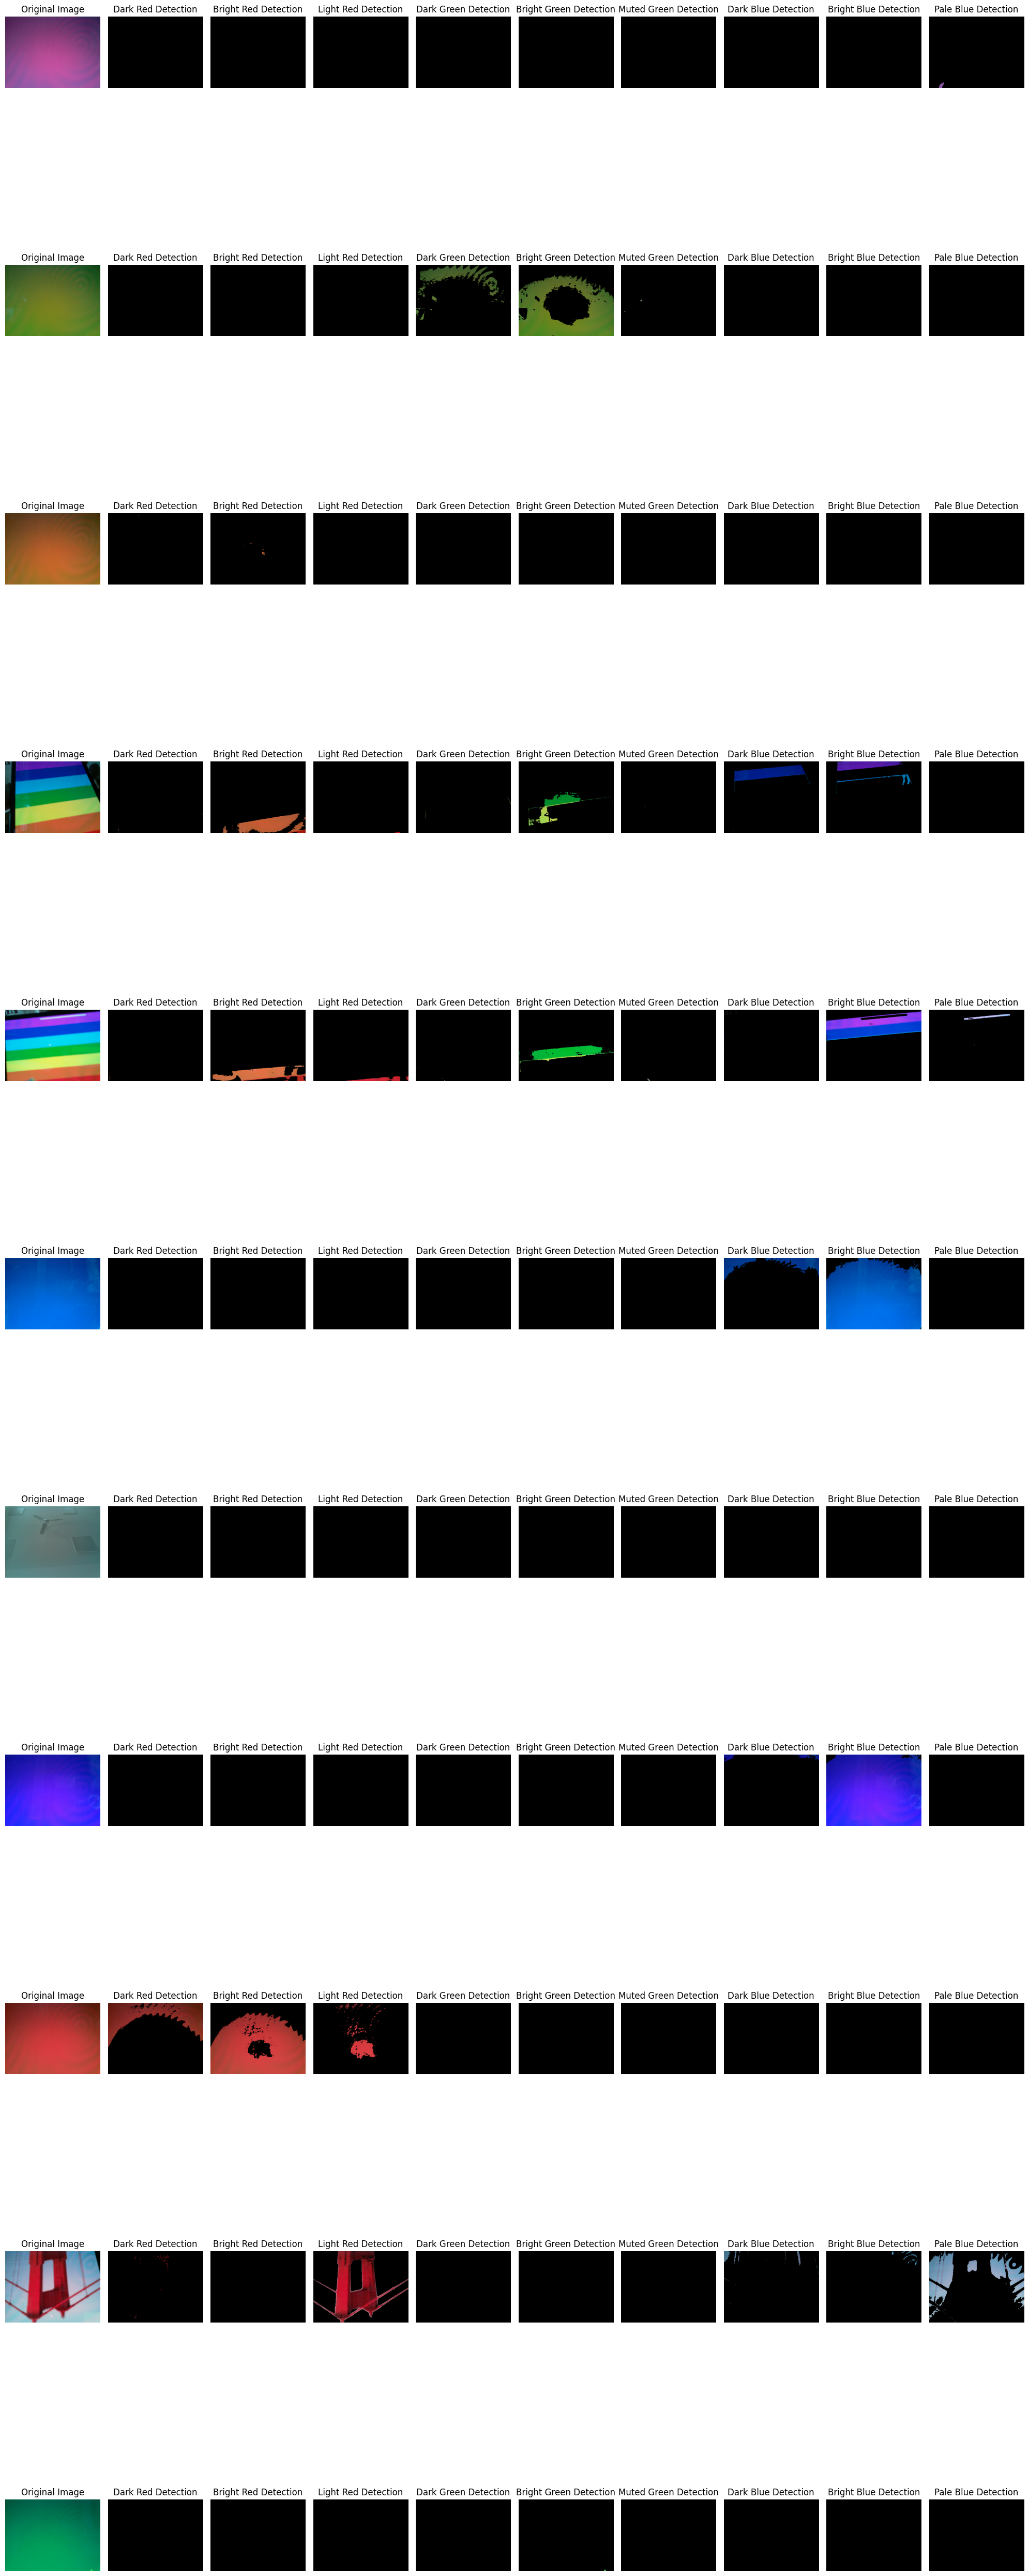

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Define a function to process each image
def process_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Resize the image for easier visualization (optional)
    image = cv2.resize(image, (400, 300))

    # Convert the image to HSV (Hue, Saturation, Value) color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define refined color ranges for red, green, and blue
    color_ranges = {
    # Refined Red
    "Dark Red": (np.array([0, 100, 50]), np.array([10, 255, 150])),
    "Bright Red": (np.array([0, 150, 150]), np.array([10, 255, 255])),
    "Light Red": (np.array([170, 50, 50]), np.array([180, 255, 255])),

    # Refined Green
    "Dark Green": (np.array([35, 50, 50]), np.array([50, 150, 150])),
    "Bright Green": (np.array([36, 150, 100]), np.array([70, 255, 255])),
    "Muted Green": (np.array([36, 50, 100]), np.array([70, 100, 200])),

    # Refined Blue
    "Dark Blue": (np.array([100, 50, 50]), np.array([120, 255, 150])),
    "Bright Blue": (np.array([100, 150, 150]), np.array([140, 255, 255])),
    "Pale Blue": (np.array([100, 50, 150]), np.array([140, 120, 255])),
}


    # Apply masks for each color subrange
    color_results = {}
    for color_name, (lower_bound, upper_bound) in color_ranges.items():
        mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
        result = cv2.bitwise_and(image, image, mask=mask)
        color_results[color_name] = result

    return image, color_results

# Step 2: Process images in the current directory
def get_image_files(directory="."):
    valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")  # Supported image formats
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.lower().endswith(valid_extensions)]

directory = "."  # Change this to the desired directory
image_files = get_image_files(directory)

images = []
color_results_all = []

for image_file in image_files:
    image, color_results = process_image(image_file)
    images.append(image)
    color_results_all.append(color_results)

# Step 3: Display the original images and results in a grid
num_images = len(images)
num_colors = len(color_results_all[0]) if color_results_all else 0
fig, axes = plt.subplots(num_images, num_colors + 1, figsize=(20, 5 * num_images))

for i in range(num_images):
    # Display the original image
    axes[i, 0].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis('off')

    # Display color detection results
    for j, (color_name, color_result) in enumerate(color_results_all[i].items(), start=1):
        axes[i, j].imshow(cv2.cvtColor(color_result, cv2.COLOR_BGR2RGB))
        axes[i, j].set_title(f"{color_name} Detection")
        axes[i, j].axis('off')

# Adjust layout and display the grid
plt.tight_layout()
plt.show()
